In [52]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties
import shap

shap.initjs()

In [53]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)

font = FontProperties(family='Arial', size=12)

In [54]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"

# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [55]:
np.shape(data)

(2301, 120)

In [56]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [57]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1764, 1991))
L12=list(range(1992, 2301))

In [58]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [59]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [60]:
# # #1,3,5,9,10,11,12
# # waqu = list(range(0, 954)) + list(range(1047, 2300))
# waqu =L10 + L3 +L5 + L1 + L11 + L9
# #9,11,12
# # Use iloc to select the rows
# X_train = data.loc[waqu].copy()
# y_train = y_series.loc[waqu].copy()

# X_test = C12
# y_test = Y12

In [61]:
# # #1,3,5,9,10,11,12
# # waqu = list(range(0, 954)) + list(range(1047, 2300))
# waqu =L1 + L3 +L5 + L12 + L11 + L9
# #9,11,12
# # Use iloc to select the rows
# X_train = data.loc[waqu].copy()
# y_train = y_series.loc[waqu].copy()

# X_test = C10
# y_test = Y10

In [62]:
# #1,3,5,9,10,11,12
# waqu = list(range(0, 954)) + list(range(1047, 2300))
waqu =L1+L3 +L5 + L10+L11+L12
#9,11,12
# Use iloc to select the rows
X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = C9
y_test = Y9

In [63]:
select_battery = '9'
MLmodel = 'lightgbm'

In [64]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1437, 120) (1437,) 测试集 (294, 120) (294,)


In [65]:
select_battery

'9'

数据读取完毕，开始模型训练。

## 第一次计算精度，使用全部特征

In [66]:
%%time
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

# 创建数据集 d_train 和 d_test
params = {
    "objective": "regression",  # 回归问题
    "metric": "mse",  # 均方误差作为性能度量
    "boosting_type": "gbdt",
    "num_leaves": 31,  # 树的叶子节点数
    "learning_rate": 0.05,  # 学习率
    "feature_fraction": 0.9,  # 每次迭代时使用的特征比例
    "bagging_fraction": 0.8,  # 每次迭代时使用的数据比例
    "bagging_freq": 5,  # 多少次迭代执行 bagging
    "verbose": -1,
    "num_round": 1000,  # 最大迭代次数
    #"early_stopping": 10,  # 设置早停的轮数
}

# model = lgb.train(params, d_train, valid_sets=[d_test])
model = lgb.train(params, d_train)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)


Found `num_round` in params. Will use it instead of argument


Wall time: 4.99 s


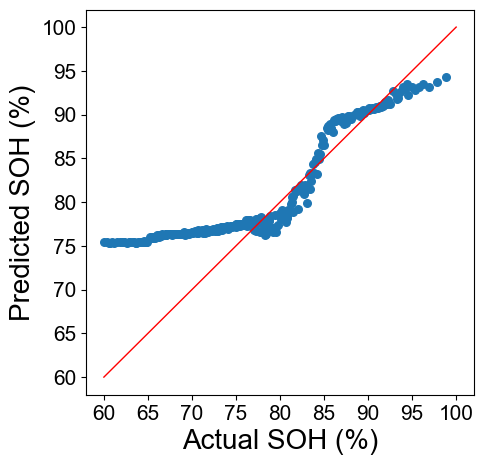

Wall time: 203 ms


In [67]:
%%time
# get predictions
# y_pred = model.predict(X)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 31.827268897548034
均方根误差 (RMSE): 5.641566174170789
决定系数 (R^2): 0.6213465241683223


1) Standard SHAP values

In [69]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 4.8 s


In [70]:
# shap_values_values = np.array(shap_values.values)

# # 保存到文件
# np.savetxt('shap_values_values.txt', shap_values_values)

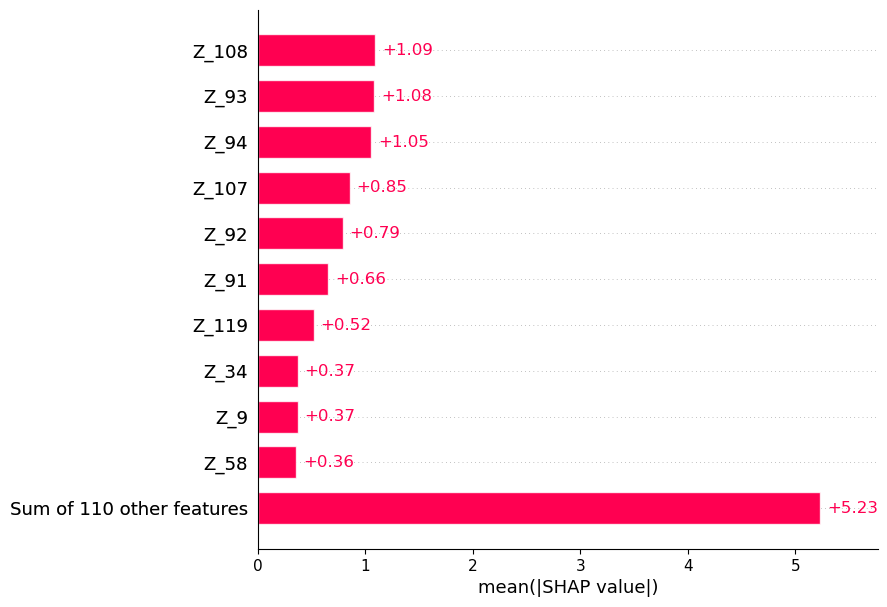

In [71]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')

# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [72]:
# 计算绝对值并按列求和
abs_shap_values = np.abs(shap_values.values) #取绝对值
mean = abs_shap_values.sum(axis=0) #求和

# 获取前k个最大值
k = 10
meantop = mean.argsort()[-k:][::-1]
meanbottom = mean.argsort()[:k]
#shap值
num_samples = shap_values.values.shape[0]
normalized_mean = mean / num_samples

# mean 中的前k个最大值
top_k_values = normalized_mean[meantop]
top_k_values

array([1.09201087, 1.08337345, 1.0537403 , 0.85430647, 0.79256964,
       0.65564837, 0.52047371, 0.37375763, 0.36884704, 0.35705943])

In [73]:
np.shape(shap_values.values)

(294, 120)

In [74]:
print(meantop)
print(meanbottom)

[108  93  94 107  92  91 119  34   9  58]
[48 44 46 41 39 18 47 49 42 50]


In [75]:
# # Define the indices of the rows you want to select
# waqu6 = list(range(0, 910)) + list(range(1122, 2548))

# # Use iloc to select the rows
# C6qu = data.iloc[waqu6].copy()
# Y6qu = y_series.iloc[waqu6].copy()

# X_test = C6
# y_test = Y6

In [76]:
X_top10_test = X_test.iloc[:, meantop]
# print(X_top10_test)
X_top10 = X_train.iloc[:, meantop]
# print(X_top10)
# train model
d_train_select = lgb.Dataset(X_top10, label=y_train)
d_test_select = lgb.Dataset(X_top10_test, label=y_test)

# 创建数据集 d_train 和 d_test
params = {
    "objective": "regression",  # 回归问题
    "metric": "mse",  # 均方误差作为性能度量
    "boosting_type": "gbdt",
    "num_leaves": 31,  # 树的叶子节点数
    "learning_rate": 0.05,  # 学习率
    "feature_fraction": 0.9,  # 每次迭代时使用的特征比例
    "bagging_fraction": 0.8,  # 每次迭代时使用的数据比例
    "bagging_freq": 5,  # 多少次迭代执行 bagging
    "verbose": -1,
    "num_round": 1000,  # 最大迭代次数
    #"early_stopping": 10,  # 设置早停的轮数
}

model_select = lgb.train(params, d_train_select)
y_pred_select = model_select.predict(X_top10_test, num_iteration=model_select.best_iteration)




Found `num_round` in params. Will use it instead of argument


## 模型预测

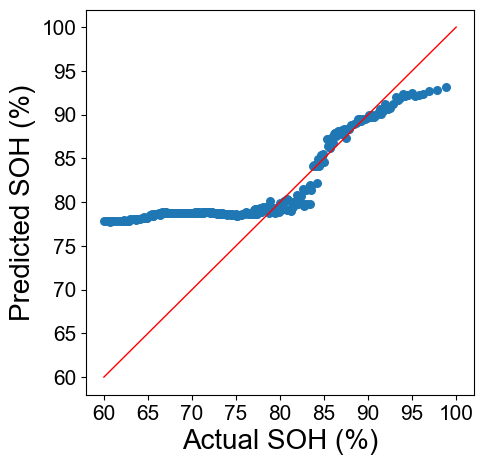

In [77]:
# get predictions

# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select,s=30)
plt.plot([60 ,100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

计算结果

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mse = mean_squared_error(y, y_pred)
mse_preferred = mean_squared_error(y_test, y_pred_select)
rmse_preferred = np.sqrt(mse_preferred)
r2_preferred = r2_score(y_test, y_pred_select)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)

均方误差 (MSE): 31.827268897548034
均方根误差 (RMSE): 5.641566174170789
决定系数 (R^2): 0.6213465241683223
top10Z 均方误差 (MSE): 49.61335660913839
top10Z 均方根误差 (RMSE): 7.0436749363622955
top10Z 决定系数 (R^2): 0.4097429475271728


bottom_10个Z的训练

Found `num_round` in params. Will use it instead of argument


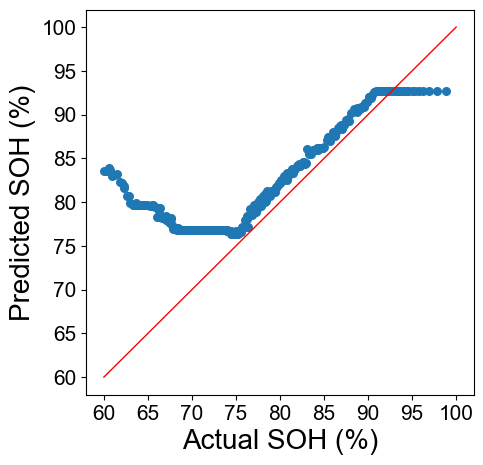

In [79]:
X_bot10_test = X_test.iloc[:, meanbottom]
# print(X_top10_test)
X_bot10_train = X_train.iloc[:, meanbottom]
# print(X_top10)
# train model

d_train_select_bot = lgb.Dataset(X_bot10_train, label=y_train)
d_test_select_bot = lgb.Dataset(X_bot10_test, label=y_test)

# 创建数据集 d_train 和 d_test
params = {
    "objective": "regression",  # 回归问题
    "metric": "mse",  # 均方误差作为性能度量
    "boosting_type": "gbdt",
    "num_leaves": 31,  # 树的叶子节点数
    "learning_rate": 0.05,  # 学习率
    "feature_fraction": 0.9,  # 每次迭代时使用的特征比例
    "bagging_fraction": 0.8,  # 每次迭代时使用的数据比例
    "bagging_freq": 5,  # 多少次迭代执行 bagging
    "verbose": -1,
    "num_round": 1000,  # 最大迭代次数
   # "early_stopping": 10,  # 设置早停的轮数
}

model_select_bot = lgb.train(params, d_train_select_bot)
y_pred_select_bot = model_select_bot.predict(X_bot10_test, num_iteration=model_select_bot.best_iteration)


# get predictions
# y_pred = model.predict(X)
y_pred_select_bot
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select_bot,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [80]:
# mse = mean_squared_error(y, y_pred)
mse_preferred_bot = mean_squared_error(y_test, y_pred_select_bot)
rmse_preferred_bot = np.sqrt(mse_preferred_bot)
r2_preferred_bot = r2_score(y_test, y_pred_select_bot)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print(meantop)
print(meanbottom)

均方误差 (MSE): 31.827268897548034
均方根误差 (RMSE): 5.641566174170789
决定系数 (R^2): 0.6213465241683223
     
top10Z 均方误差 (MSE): 49.61335660913839
top10Z 均方根误差 (RMSE): 7.0436749363622955
top10Z 决定系数 (R^2): 0.4097429475271728
     
bot10Z 均方误差 (MSE): 53.64307295804658
bot10Z 均方根误差 (RMSE): 7.324143155212532
bot10Z 决定系数 (R^2): 0.3618008477183081
     
[108  93  94 107  92  91 119  34   9  58]
[48 44 46 41 39 18 47 49 42 50]


In [81]:
# 准备箱型图数据
y_testv=y_test.values
values_to_save = [ select_battery,MLmodel,y_testv,y_pred,y_pred_select,y_pred_select_bot]
value_names = ["电池","模型","y测试值","y_all_pred","y_top_pred","y_bot_pred"]

file_name = f"pre_boxfig_被测电池_{select_battery}_模型{MLmodel}.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")

In [82]:
 select_battery

'9'

## 任选特征训练；最优特征

In [83]:
some1=meantop

In [84]:
some2=meanbottom

In [85]:
some3 = [96, 0, 90, 88, 91, 87, 21, 93, 97,  16]

In [86]:
some = some3

In [87]:
some

[96, 0, 90, 88, 91, 87, 21, 93, 97, 16]

In [88]:
X_some_train=X_train.iloc[:, some]
X_some_test=X_test.iloc[:, some]

In [89]:
# np.shape(X_some_test)

In [90]:

d_train_select_some = lgb.Dataset(X_some_train, label=y_train)
d_test_select_some = lgb.Dataset(X_some_test, label=y_test)

# 创建数据集 d_train 和 d_test
params = {
    "objective": "regression",  # 回归问题
    "metric": "mse",  # 均方误差作为性能度量
    "boosting_type": "gbdt",
    "num_leaves": 31,  # 树的叶子节点数
    "learning_rate": 0.05,  # 学习率
    "feature_fraction": 0.9,  # 每次迭代时使用的特征比例
    "bagging_fraction": 0.8,  # 每次迭代时使用的数据比例
    "bagging_freq": 5,  # 多少次迭代执行 bagging
    "verbose": -1,
    "num_round": 1000,  # 最大迭代次数
    #"early_stopping": 10,  # 设置早停的轮数
}

model_select_some = lgb.train(params, d_train_select_some)
y_pred_some = model_select_some.predict(X_some_test, num_iteration=model_select_some.best_iteration)


Found `num_round` in params. Will use it instead of argument


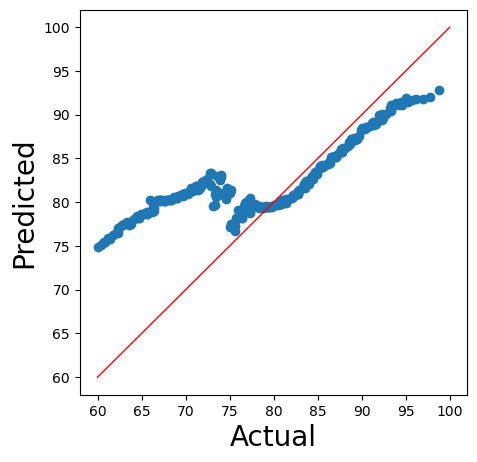

In [91]:

# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_some)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)
plt.show()
plt.close()

In [92]:
# mse = mean_squared_error(y, y_pred)
mse_some = mean_squared_error(y_test, y_pred_some)
rmse_some = np.sqrt(mse_some)
r2_some = r2_score(y_test, y_pred_some)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print("some 均方根误差 (RMSE):", rmse_some)
print("some 均方误差 (MSE):", mse_some)
print("some 决定系数 (R^2):", r2_some)

均方误差 (MSE): 31.827268897548034
均方根误差 (RMSE): 5.641566174170789
决定系数 (R^2): 0.6213465241683223
     
top10Z 均方根误差 (RMSE): 7.0436749363622955
top10Z 均方误差 (MSE): 49.61335660913839
top10Z 决定系数 (R^2): 0.4097429475271728
     
bot10Z 均方根误差 (RMSE): 7.324143155212532
bot10Z 均方误差 (MSE): 53.64307295804658
bot10Z 决定系数 (R^2): 0.3618008477183081
     
some 均方根误差 (RMSE): 7.809240376524449
some 均方误差 (MSE): 60.984235258339716
some 决定系数 (R^2): 0.2744620116215477


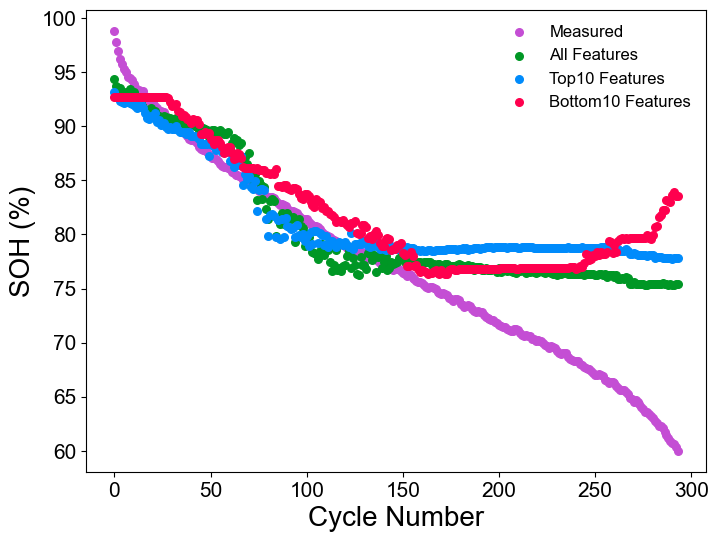

In [93]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

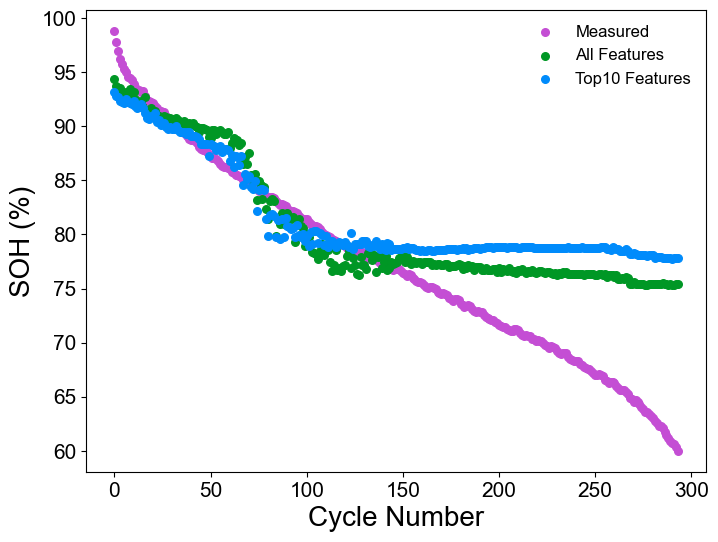

In [94]:
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 随机选择k个点，作为输入特征的性能。

In [95]:
import random
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# 初始化一个空列表来存储所有的 r2_score
r2_scores = []
same_variables = []
mse_sames = []

# 设置循环次数 w
w = 200
# 设置特征数量
random_number = 10

# 特征总数
total_features = X_train.shape[1]

for _ in range(w):
    # 随机选择五个特征的索引
    random_features = random.sample(range(total_features), random_number)

    # 转化成字符串并用逗号分隔
    five = ",".join(map(str, random_features))

    # 复制到 some 变量
    same = five

    # 存储 some 变量
    same_variables.append(same)
    
    # 从 X_train 和 X_test 中提取对应的特征
    X_same_train = X_train.iloc[:, random_features]
    X_same_test = X_test.iloc[:, random_features]

    # 初始化 XGBoost 模型
    #model_same = xgb.XGBRegressor(objective="reg:squarederror")
    
    d_train_select_same = lgb.Dataset(X_same_train, label=y_train)
    d_test_select_same = lgb.Dataset(X_same_test, label=y_test)

# 创建数据集 d_train 和 d_test
    params = {
    "objective": "regression",  # 回归问题
    "metric": "mse",  # 均方误差作为性能度量
    "boosting_type": "gbdt",
    "num_leaves": 31,  # 树的叶子节点数
    "learning_rate": 0.05,  # 学习率
    "feature_fraction": 0.9,  # 每次迭代时使用的特征比例
    "bagging_fraction": 0.8,  # 每次迭代时使用的数据比例
    "bagging_freq": 5,  # 多少次迭代执行 bagging
    "verbose": -1,
    "num_round": 1000,  # 最大迭代次数
    #"early_stopping": 10,  # 设置早停的轮数
    }

    model_select_same = lgb.train(params, d_train_select_same)
    y_pred_same = model_select_same.predict(X_same_test, num_iteration=model_select_same.best_iteration)

    

    # 训练模型
#     model_same.fit(X_same_train, y_train)

    # 预测
#     y_pred_same = model_same.predict(X_same_test)

    # 计算 R-squared 分数
    r2_same_random = r2_score(y_test, y_pred_same)

    # 存储 R-squared 分数
    r2_scores.append(r2_same_random)
    
    # mse = mean_squared_error(y, y_pred)
    mse_same = mean_squared_error(y_test, y_pred_same)
    mse_sames.append(mse_same)
    
# 输出所有 R-squared 分数
np.shape(r2_scores)


Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in params. Will use it instead of argument
Found `num_round` in par

(200,)

In [96]:
# 计算R-squared的平均值
average_r2 = sum(r2_scores) / len(r2_scores)

std_deviation = np.std(r2_scores)
print("Random_numbers:",random_number,".","Average R-squared:", average_r2,f"R-squared标准差: {std_deviation}")

Random_numbers: 10 . Average R-squared: 0.5506828737226983 R-squared标准差: 0.189733070987975


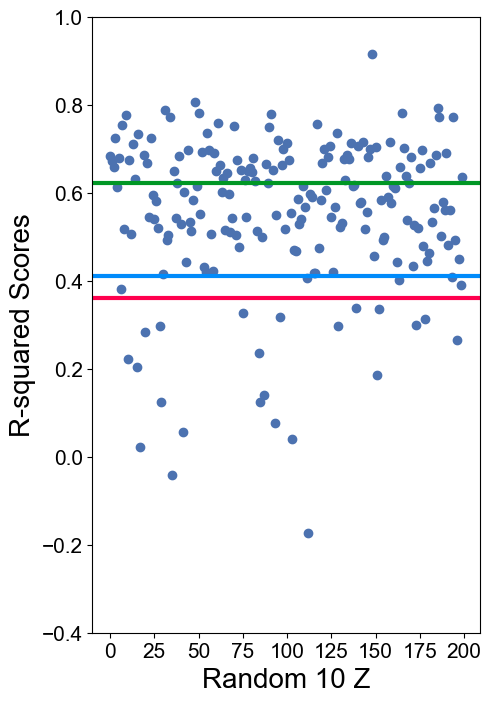

In [97]:
import matplotlib.patches as mpatches
font = FontProperties(family='Arial', size=12)

# plt.figure(figsize=(5, 8), facecolor='white')

plt.figure(figsize=(5, 8))

# # 使用序号作为横坐标，r2_scores 作为纵坐标
plt.scatter(range(len(same_variables)), r2_scores,color=bluegreyse)

# 添加标签

plt.xlabel("Random 10 Z", fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel("R-squared Scores", fontdict={'size': 20, 'family': 'Arial'})
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15


y_allfe = r2_all ##全部特征，绿色
plt.axhline(y=y_allfe, color=greense, linewidth=3)

y_topfe=r2_preferred#顶部十个特征，蓝色
plt.axhline(y=y_topfe, color=bluese, linewidth=3)

y_bottomfe= r2_preferred_bot #底部十个特征，红色
plt.axhline(y=y_bottomfe, color=redse, linewidth=3)

# y_some= r2_some #最优十个特征，棕色
# plt.axhline(y=y_some, color=purplese, linewidth=3)

plt.ylim(-0.4, 1)
# plt.savefig( f"{select_battery}_{MLmodel}_性能图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig(f"{select_battery}_{MLmodel}_性能图.eps", format='eps', dpi=600, bbox_inches='tight')
# 创建自定义图例
legend_elements = [
    mpatches.Patch(color=greense, label='All Z'),
    mpatches.Patch(color=bluese, label='Top10 Z'),
    mpatches.Patch(color=redse, label='Bottom10 Z'),
    mpatches.Patch(color=bluegreyse, label='Random10 Z')
]

# 添加自定义图例到图表
# plt.legend(handles=legend_elements,prop=font, facecolor='white', frameon=False,loc=(0.60,0.05))
plt.grid(False)
# 显示图表

plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [98]:
# 输出所有的 R-squared 分数和 some 变量
for i in range(w):
    print(f"Iteration {i+1}: R-squared = {r2_scores[i]},mse= {mse_sames[i]} ,same = {same_variables[i]}")

Iteration 1: R-squared = 0.6835198671022042,mse= 26.601362283407333 ,same = 98,49,89,27,85,109,54,18,113,57
Iteration 2: R-squared = 0.6729809521210304,mse= 27.487198284932184 ,same = 74,32,55,113,57,106,23,64,79,16
Iteration 3: R-squared = 0.6590207682292415,mse= 28.66060498774216 ,same = 80,14,118,39,104,23,97,16,95,65
Iteration 4: R-squared = 0.7245010217384461,mse= 23.156739926581352 ,same = 102,39,16,2,12,109,89,69,62,56
Iteration 5: R-squared = 0.6132446515843304,mse= 32.50826219026248 ,same = 15,6,56,17,2,101,119,78,89,13
Iteration 6: R-squared = 0.6781118205395926,mse= 27.05592922427761 ,same = 27,117,95,44,38,102,56,115,97,20
Iteration 7: R-squared = 0.380724395799768,mse= 52.052476563912236 ,same = 4,28,10,20,49,26,59,80,23,118
Iteration 8: R-squared = 0.7544512587592889,mse= 20.63930826927524 ,same = 2,117,86,67,37,61,77,96,13,74
Iteration 9: R-squared = 0.5165325630025427,mse= 40.6372821132285 ,same = 16,90,111,109,15,92,108,40,24,107
Iteration 10: R-squared = 0.77755723358

normalized_mean #全部的shap值
top_k_values #前10个shap的值
meantop #前10个shap的特征

mse_all
rmse_all
r2_all

rmse_preferred
mse_preferred
r2_preferred

rmse_preferred_bot
mse_preferred_bot
r2_preferred_bot

rmse_some
mse_some
r2_some
r2_scores #随机特征的结果
select_battery = '第1节'

## 保存重要数据

In [99]:

# 创建一个包含多个变量的字典
values_to_save = [ select_battery,MLmodel,r2_all,r2_preferred,r2_preferred_bot,r2_some,average_r2,meantop, normalized_mean, top_k_values,rmse_all,mse_all,  rmse_preferred, mse_preferred,rmse_preferred_bot,mse_preferred_bot,rmse_some,mse_some,r2_scores]
value_names = ["电池","模型","全部特征精度","顶部特征精度","底部特征精度","终选特征精度","随机特征平均精度","top10特征", "全部的shap值", "top10 shap值","rmse_all","mse_all","rmse_top", "mse_top", "rmse_bot","mse_bot","rmse_some终选","mse_some终选","r2_scores随机特征"]

file_name = f"被测电池_{select_battery}_模型{MLmodel}_全部数据.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")



In [1]:
## end